This homework is based on HW3 assignment 2, based on the review comments from professor, I refrase the Idea and NULL hypothesis, to make them more clear and more importantly, correctly matching my analysis.

Orginally I was trying to compare people use bikes for commute, and I defined commute as usage during Monday to Friday . But same as reviewer pointed out, with further thinking, that is a really questionable defination since a lot of visitors are using CitiBike on weekdays as well. So the idea is simplified and is more clearly defined : comparing two age groups riders' usage on weekends/weekdays. 

# Idea: Bikers over 30 years old are less likely to use Citibike on weekends over weekdays than bikers under 30.

# NULL HYPOTHESIS:

The ratio of riders who are over 30 years old biking on weekends over the weekdays is the same or higher than the ratio of riders who are under 30 years old biking on weekends over biking on weekdays

H_0: frac{{under30{weekend}}{under30{{week}}} <= frac{over30{weekend}}{over30{week}}

H_1: frac{under30{weekend}}{under30{week}}} > frac{over30{weekend}}{over30{week}}

or:

H_0: frac{{under30{weekend}}{under30{week}}} - frac{over30{weekend}}}{over30{week}}} <= 0 

H_1: frac{{under30{weekend}}{under30{week}}} - frac{over30{weekend}}}{over30{week}}} > 0

**significance level  alpha=0.05

In [16]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%pylab inline

if os.getenv ('PUI2017') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os
import json
#s = json.load( open(os.getenv('PUI2017') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [17]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [18]:
#choose time period and download csv file
datestring='201606'
getCitiBikeCSV(datestring)

file in place, you can continue


In [19]:
datestring='201606'

#load data to dataframe
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
#print(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [20]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [21]:
df_select = df[['date','birth year']]

In [22]:
df_select.head()

,date,birth year
0,2016-06-01 00:00:18,1972.0
1,2016-06-01 00:00:20,1967.0
2,2016-06-01 00:00:21,1989.0
3,2016-06-01 00:00:28,1991.0
4,2016-06-01 00:00:53,1989.0


In [23]:
len(df_select)

1460318

In [24]:
df_select = df_select[df_select['birth year'].notnull()]

In [25]:
len(df_select)

1265112

In [40]:
#calculate how the total counts,error of rider over/under 30
counts_over30 = df_select['date'][df_select['birth year']<(2017-30)].groupby([df_select['date'].dt.weekday]).count() 
counts_under30 = df_select['date'][df_select['birth year']>(2017-30)].groupby([df_select['date'].dt.weekday]).count() + df_select['date'][df_select['birth year']==(2017-30)].groupby([df_select['date'].dt.weekday]).count()
error_over30 = np.sqrt(counts_over30)
error_under30 = np.sqrt(counts_under30)

In [41]:
#plot function
def PlotTheDistribution (counts1, counts2, norm1, norm2, error1, error2, ylabel):
    fig = pl.figure(figsize(10,10))
    ((counts1) / norm1).plot(kind="bar", color='IndianRed', yerr=[
            ((error1) / norm1, (error1) / norm1)], alpha=0.5, label='RiderOver30')
    ax = ((counts2) / norm2).plot(kind="bar", color='SteelBlue', yerr=[
            ((error2) / norm2, (error2) / norm2)], alpha=0.5, label='RiderUnder30')
    tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
    ax.set_ylabel (ylabel,fontsize=16)
    ax.set_xlabel ("Day of the week",fontsize=16)
    ax.set_title ("Distribution of Citibike bikers by age over 30 or under 30",fontsize=20)
    pl.legend(fontsize=20)

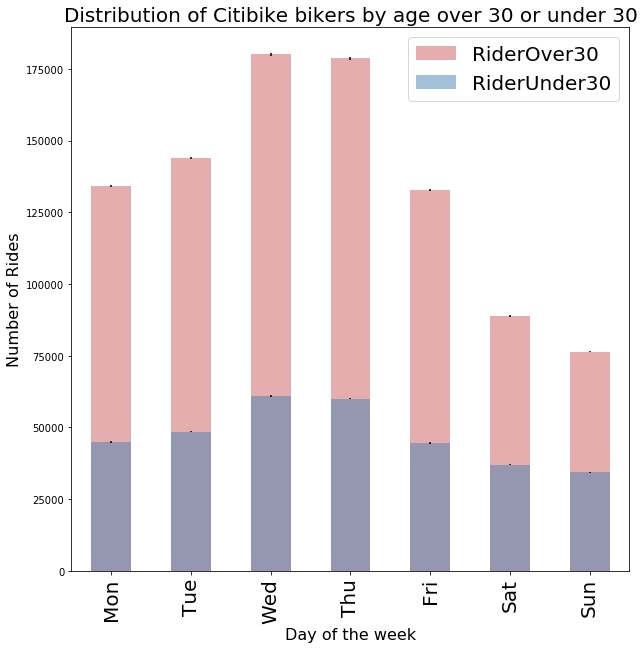

In [42]:
#Unnormalized with error info plot
norm_over30 = 1
norm_under30 = 1
PlotTheDistribution(counts_over30, counts_under30, norm_over30, norm_under30, error_over30, error_under30,'Number of Rides')

# Figure 1a: Distribution of Citibike bikers by age over 30 and under 30 in June 2016, absolute counts with error info

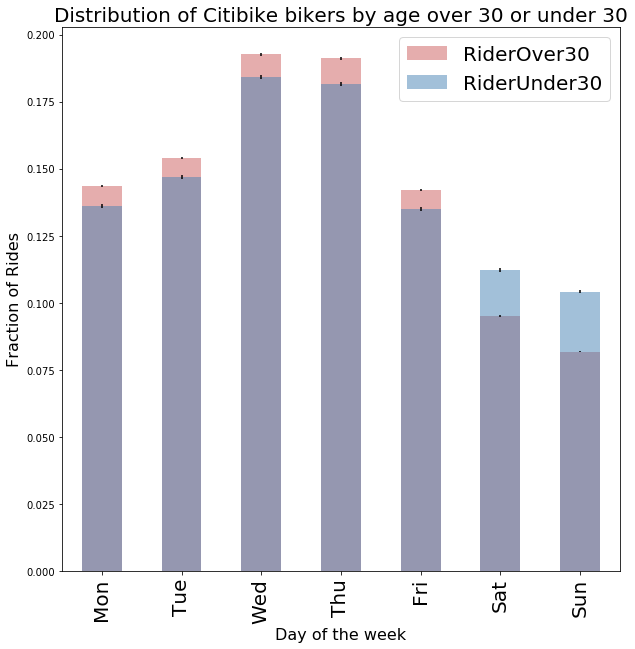

In [43]:
#Normalized with error info plot
norm_over30 = counts_over30.sum()
norm_under30 = counts_under30.sum() 
PlotTheDistribution(counts_over30, counts_under30, norm_over30, norm_under30, error_over30, error_under30, 'Fraction of Rides')

In [44]:
#Function of riders age group fraction during the week
def PlotTheFraction(fraction1, fraction2, error1, error2, timeline):
    fig = plt.figure(figsize(8,8))
    plt.errorbar([0.4], [fraction1], yerr=[error1], fmt='o', label='RiderOver30')
    plt.errorbar([0.2], [fraction2], yerr=[error2], fmt='o', label='RiderUnder30')
    plt.title(timeline, fontsize=20)
    plt.xlim(0, 0.5)
    plt.xticks([])
    plt.ylabel("Fraction of normalized rides by Age",fontsize=16)
    plt.legend(fontsize=20)
    plt.show()

In [45]:
#Fraction of riders over 30 that bikes during the weekdays 
#and the fraction that bikes during weekends, and the same for the use under30
week_over30 = sum(counts_over30[:-2]) * 1.0 / norm_over30
weekend_over30 = sum(counts_over30[-2:])*1.0 / norm_over30
week_over30_error = np.sqrt(sum(error_over30[:-2]**2)) / norm_over30
weekend_over30_error = np.sqrt(sum(error_over30[-2:]**2)) / norm_over30
week_under30 = sum(counts_under30[:-2]) * 1.0 / norm_under30
weekend_under30 = sum(counts_under30[-2:])*1.0 / norm_under30
week_under30_error = np.sqrt(sum(error_under30[:-2]**2)) / norm_under30
weekend_under30_error = np.sqrt(sum(error_under30[-2:]**2)) / norm_under30
print("RiderOver30: week:{0:.4f}, weekend:{1:.4f}, week error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_over30, weekend_over30, week_over30_error, weekend_over30_error))
print("RiderUnder30: week:{0:.4f}, weekend:{1:.4f}, week error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_under30, weekend_under30, week_under30_error, weekend_under30_error))

RiderOver30: week:0.8231, weekend:0.1769, week error:0.0009, weekend error:0.0004
RiderUnder30: week:0.7838, weekend:0.2162, week error:0.0015, weekend error:0.0008


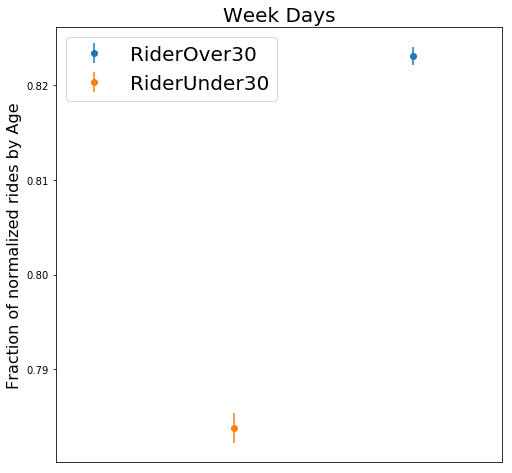

In [46]:
#Plot the fraction of Riders on week days with error
PlotTheFraction(week_over30, week_under30, week_over30_error, week_under30_error, 'Week Days')

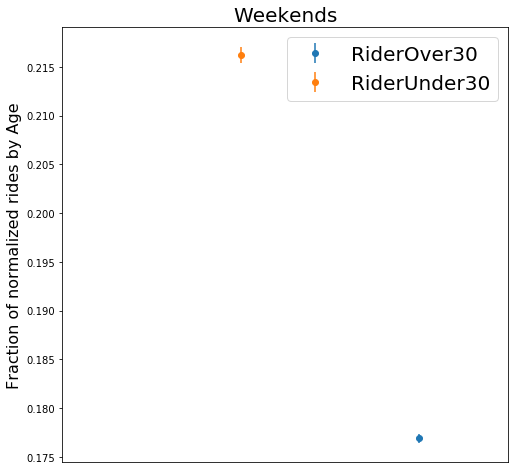

In [47]:
#Plot the fraction of Users on weekends with error
PlotTheFraction(weekend_over30, weekend_under30, weekend_over30_error, weekend_under30_error, 'Weekends')

In [48]:
P0mP1 = weekend_under30 - weekend_over30
print ("difference between fraction of riders over 30 and fraction of riders under 30 on weekends: ", P0mP1)
if P0mP1 <= 0:
    print("In accordance with Null Hypothesis")
else:
    print ("We must check the significance before we reject the Null Hypothesis")

difference between fraction of riders over 30 and fraction of riders under 30 on weekends:  0.039322993857903915
We must check the significance before we reject the Null Hypothesis


# Z Test(just for reference, this project we use the Chi Square test below)

In [49]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_under30, weekend_over30, norm_under30, norm_over30), norm_under30, norm_over30)
# print (sp_stdev_mw)
z = zscore(weekend_under30, weekend_over30, sp_stdev_mw)
print ("The z statistics is %.2f"%z)

The z statistics is 49.81


# z-score is 49.81, far more than largest number in one-tailed z stats 0.05 as 1.65 one-tailed or 3 as two-tailed, thus p <<  0.05, it means we can reject the null hypothesis, and support the H1 which is riders over age 30 has less CitiBike rides than riders under age 30.

# Now lets do it with the $\chi^2$ test

print out all the information we need to do the chi square test

In [50]:
print('total over30:  {0:d},\ntotal under30:  {1:d},\nweek over 30 fraction:  {2:.3f},\nweekend over 30 fraction:  {3:.3f},\nweek under 30 fraction:  {4:.3f},\nweekend under 30 fraction:  {5:.3f}'.format(norm_over30,norm_under30,week_over30,weekend_over30,week_under30,weekend_under30))

total over30:  934674,
total under30:  330438,
week over 30 fraction:  0.823,
weekend over 30 fraction:  0.177,
week under 30 fraction:  0.784,
weekend under 30 fraction:  0.216


CHI Square Contigency Table

| rideship                  |     on weekend        | not on weekend   |                      |
|---------------------------|:---------------------:|------------------|----------------------|
| age over 30               | $0.177*934674$        | $0.823*934674$   | 934674               |
| age under 30              | $0.216*330438$        | $0.784*330438$   | 330438               |
|                           |                       |                  |                      |
| total                     | 236812                | 1028301          | 1265112              |

In [51]:
observations = [[0.177*934674, 0.823*934674], [0.216*330438, 0.784*330438]]
N = 1265112
ob1 = observations[0][0]+observations[1][0]
ob2 = observations[0][1]+observations[1][1]
expectation = 934674 * 330438 * ob1 * ob2
chisqstat= lambda N, observations, expectation : N * ((observations[0][0] * observations[1][1]
                                            -observations[0][1] * observations[1][0])**2) / expectation

print (chisqstat(N, observations, expectation))

2440.534365316402


# 2440.53 is way more than the 3.84 which means goes far into Chi square 0.05 end. So we can reject the NULL hypothesis that riders age over 30 has equal or more usage on weekend than riders age under 30.